In [5]:
import sys
sys.path.append('/home/lev/object-centric/edge-generation/models/')
import torch_geometric
import torch
from omegaconf import OmegaConf
from dataloader import PL_DataModule
from models.model import Network

import hydra
import matplotlib.pyplot as plt

from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.metrics import confusion_matrix
import numpy as np
# own modules
from dataloader import PL_DataModule
from method import LitModel

initialize(config_path='outputs/2022-02-03/16-59-59/.hydra', job_name="test_app")


hydra.initialize()

In [3]:
def get_dataloader(cfg):
    return PL_DataModule(cfg.dataloader)
def get_model_loaders(weights_path):
    cfg = compose(config_name="config")
    # Setup dataloader and model
    datamodule = get_dataloader(cfg)

    # Obtain feature sizes and number of labels
    batch = next(iter(datamodule.train_dataloader()))
    cfg.model.opt.loader_batches = len(datamodule.train_dataloader())
    cfg.model.insize ,cfg.model.outsize = batch.x.shape[1], torch.unique(batch.y).shape[0]
    model = LitModel(cfg=cfg)
    # upload weights
    state_dict = torch.load(weights_path)['state_dict']
    model.load_state_dict(state_dict)
    return model, datamodule


In [6]:
weights_path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/16-59-59/some_project/2o7cfnqe/checkpoints/epoch=709-step=709.ckpt'

model, datamodule = get_model_loaders(weights_path)

batch = next(iter(datamodule.train_dataloader()))
model.model.loss_function(batch)

Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


{'loss': tensor(0.0702, dtype=torch.float64, grad_fn=<AddBackward0>),
 'cross_entrop': tensor(0.0576, grad_fn=<NllLossBackward0>),
 'accuracy': tensor(0.9785),
 'f1': tensor([0.9785]),
 'avr_precision': tensor(0.9978),
 'aucroc': tensor(0.9997),
 'temperatue_0': tensor(1.8626),
 'temperatue_1': tensor(1.9298),
 'temperatue_2': tensor(1.5702),
 'loss_prob': tensor(0.0126, dtype=torch.float64, grad_fn=<MulBackward0>)}

mean prob: 


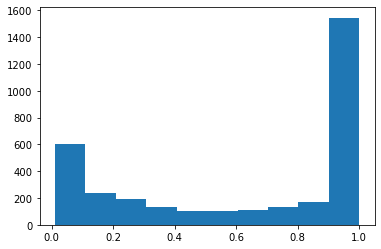

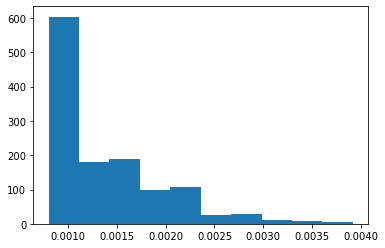

edge stat: tensor(0.7645)
mean prob: 


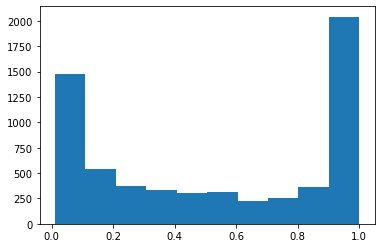

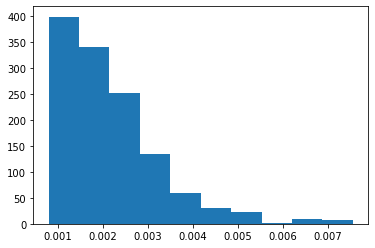

edge stat: tensor(0.4134)
mean prob: 


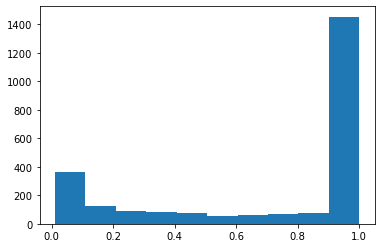

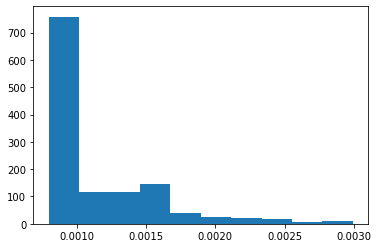

edge stat: tensor(0.2016)


In [7]:
for i in range(len(model.model.model.model)):
    print("mean prob: ")
    smt = model.model.model.model[i].edge_conv.probs.view(-1).detach().cpu().numpy() 
    
    plt.hist(smt[smt > 0.01])
    plt.show()
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])
    

Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


mean prob: 


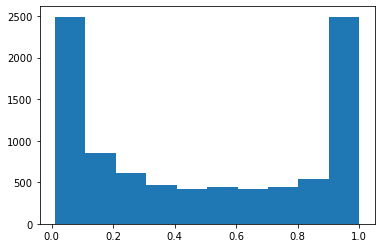

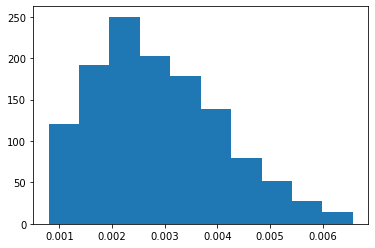

edge stat: tensor(0.4439)
mean prob: 


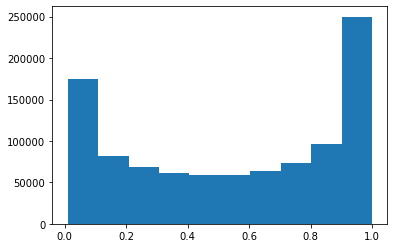

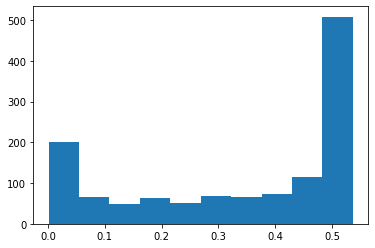

edge stat: tensor(0.1618)
mean prob: 


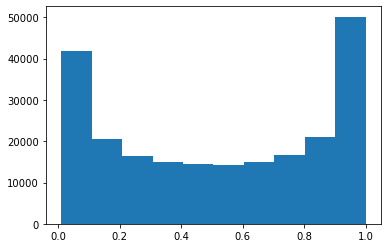

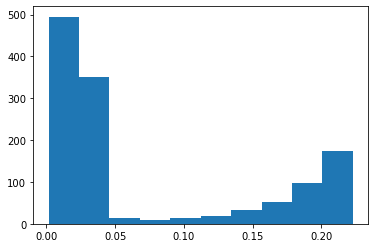

edge stat: tensor(0.2912)


In [8]:

path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/digits_minus_loss/some_project/1rwici2u/checkpoints/epoch=159-step=159.ckpt'

model, datamodule = get_model_loaders(path)

batch = next(iter(datamodule.train_dataloader()))
model.model.loss_function(batch)


for i in range(len(model.model.model.model)):
    print("mean prob: ")
    smt = model.model.model.model[i].edge_conv.probs.view(-1).detach().cpu().numpy() 
    
    plt.hist(smt[smt > 0.01])
    plt.show()
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])
    

Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


mean prob: 


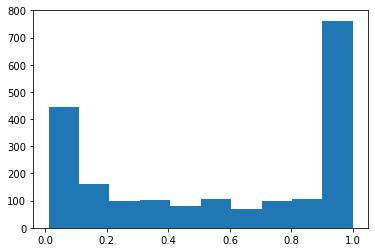

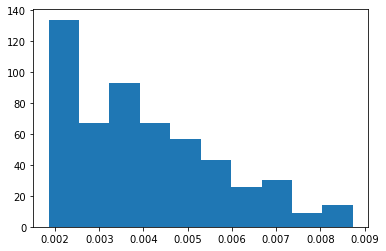

edge stat: tensor(0.5907)
mean prob: 


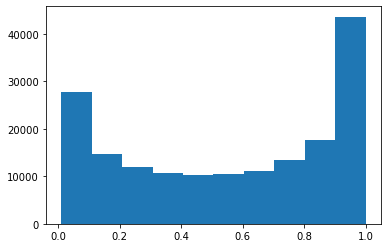

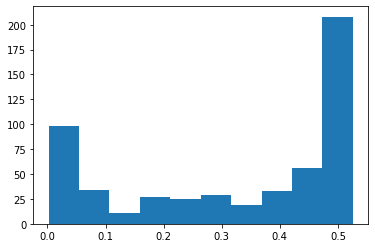

edge stat: tensor(0.2011)
mean prob: 


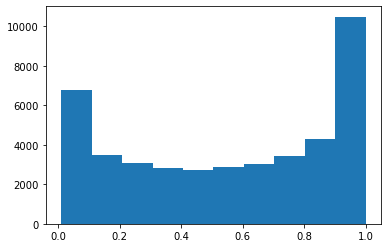

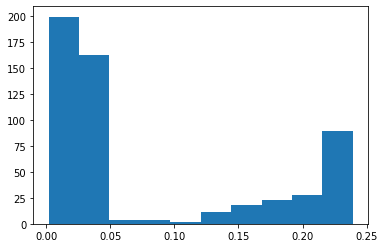

edge stat: tensor(0.2811)


In [9]:
path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/digits_minus_loss/some_project/1rwici2u/checkpoints/epoch=159-step=159.ckpt'

model, datamodule = get_model_loaders(path)

batch = next(iter(datamodule.val_dataloader()))
model.model.loss_function(batch)


for i in range(len(model.model.model.model)):
    print("mean prob: ")
    smt = model.model.model.model[i].edge_conv.probs.view(-1).detach().cpu().numpy() 
    
    plt.hist(smt[smt > 0.01])
    
    plt.show()
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])

Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


mean prob: 


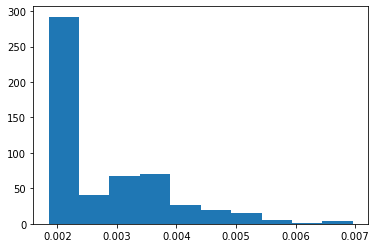

edge stat: tensor(0.8148)
mean prob: 


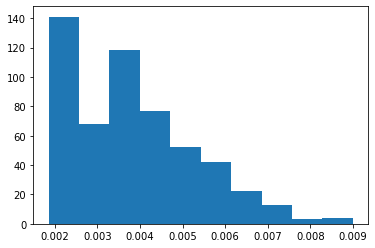

edge stat: tensor(0.3652)
mean prob: 


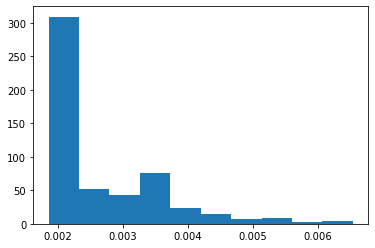

edge stat: tensor(0.2087)


In [5]:
path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/18-30-48/some_project/2c2czufy/checkpoints/epoch=429-step=429.ckpt'


model, datamodule = get_model_loaders(path)

batch = next(iter(datamodule.val_dataloader()))
model.model.loss_function(batch)


for i in range(len(model.model.model.model)):
    print("mean prob: ")
    smt = model.model.model.model[i].edge_conv.probs.view(-1).detach().cpu().numpy() 
    
    plt.hist(smt[smt > 0.01])
    plt.show()
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])

In [22]:

edge_index = model.model.model.model[0].edge_conv.edge_index

edge_index = edge_index[:,torch.argsort(edge_index[1])]


a = batch.y[edge_index[:,:]]
print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])

a[:,20:40]
edge_index[:,20:40]

edge stat: tensor(0.8148)


Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


mean prob: 


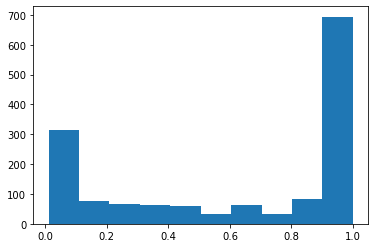

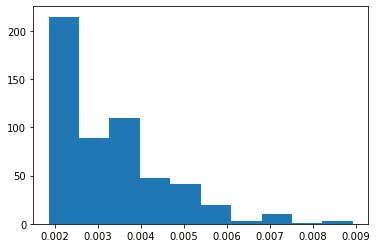

edge stat: tensor(0.7111)
mean prob: 


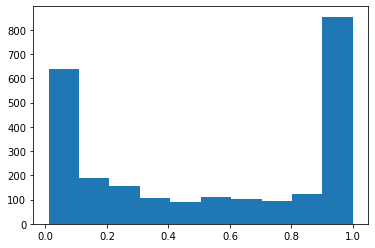

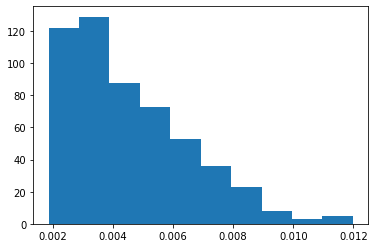

edge stat: tensor(0.5537)
mean prob: 


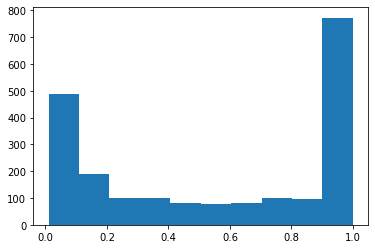

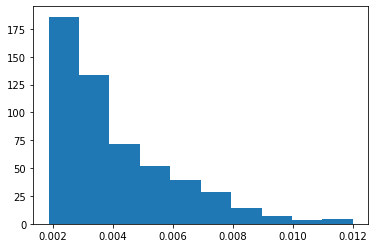

edge stat: tensor(0.4926)


In [21]:
rel_path =  "outputs/2022-02-03/18-39-28/.hydra"
#initialize(config_path=rel_path, job_name="test_app")
path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/18-39-28/some_project/1kg083ob/checkpoints/epoch=349-step=349.ckpt'


model, datamodule = get_model_loaders(path)

batch = next(iter(datamodule.val_dataloader()))
model.model.loss_function(batch)


for i in range(len(model.model.model.model)):
    print("mean prob: ")
    smt = model.model.model.model[i].edge_conv.probs.view(-1).detach().cpu().numpy() 
    
    plt.hist(smt[smt > 0.01])
    plt.show()
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])

0.49923623

In [11]:
model.model.model.model[i].edge_conv.probs.view(-1)

tensor([1.0000e+00, 1.0000e-06, 1.0000e-06,  ..., 1.0000e-06, 1.0000e-06,
        1.0000e+00], grad_fn=<ViewBackward0>)

In [7]:

edge_index = model.model.model.model[1].edge_conv.edge_index

edge_index = edge_index[:,torch.argsort(edge_index[1])]


a = batch.y[edge_index[:,:]]
print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])

print(a[:,:15])
print(edge_index[:, :15])

edge stat: tensor(0.5537)
tensor([[2, 2, 8, 3, 2, 5, 6, 6, 6, 6, 8, 1, 7, 1, 8],
        [2, 2, 8, 8, 2, 2, 6, 6, 6, 6, 7, 7, 1, 1, 9]])
tensor([[  0, 102,   1, 270,   2, 200,   3, 404,  13,   4, 246, 128, 245, 202,
         377],
        [  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,   6,
           7]])
